In [9]:
from utils.utilities import get_engine
import pandas as pd
from analysis.modules.efficient_frontier import ef_random_portfolio
from analysis.modules.fibonacci_retracement import fibonacci_retracement_strategy
from analysis.modules.indicators import momentum_indicators

In [10]:
PLAN_RANGE = 30
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
engine = get_engine(country = 'AU')

In [12]:
small_cap_query = f"""
    SELECT
        company_name,
        fundamental->>'industry' AS industry,
        stock_code,
        fundamental->>'marketCap' AS market_cap,
        fundamental->>'priceToBook' AS pb_ratio,
        fundamental->>'debtToEquity' AS de_ratio
    FROM stock_info
    WHERE
        CAST(fundamental->>'marketCap' AS FLOAT) >= 100000000
        AND
        CAST(fundamental->>'marketCap' AS FLOAT) < 2000000000
        AND
        CAST(fundamental->>'priceToBook' AS FLOAT) >= 0.3
        AND
        CAST(fundamental->>'priceToBook' AS FLOAT) < 1
        AND
        CAST(fundamental->>'debtToEquity' AS FLOAT) < 1.1

"""
df = pd.read_sql_query(small_cap_query, engine)
df

,company_name,industry,stock_code,market_cap,pb_ratio,de_ratio
0,Ardent Leisure Ltd,Leisure,ALG,218266272,0.83804137,0.236
1,Jupiter Mines Ltd,Other Industrial Metals & Mining,JMS,342914240,0.7383966,0.107
2,Pacific Current Group Ltd,Asset Management,PAC,448175424,0.8796437,0.554
3,Lake Resources NL,Other Industrial Metals & Mining,LKE,156759904,0.9166667,0.949
4,Bathurst Resources Limited,Coking Coal,BRL,184662400,0.65512556,0.454
5,Carlton Investments Ltd,Asset Management,CIN,795564736,0.9633263,0.02
6,Delta Lithium Ltd,Gold,DLI,220545792,0.92537314,0.067
7,Grange Resources Limited,Other Industrial Metals & Mining,GRR,509229600,0.5352798,0.524
8,Hot Chili Ltd,Copper,HCH,118250552,0.5816686,0.15
9,Pointsbet Holdings Ltd,Gambling,PBH,254576416,0.49295774,0.716


Query data


Convert data to close format
Begin calculation


/home/khoa/anaconda3/envs/stock/lib/python3.8/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/khoa/anaconda3/envs/stock/lib/python3.8/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning:

The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.



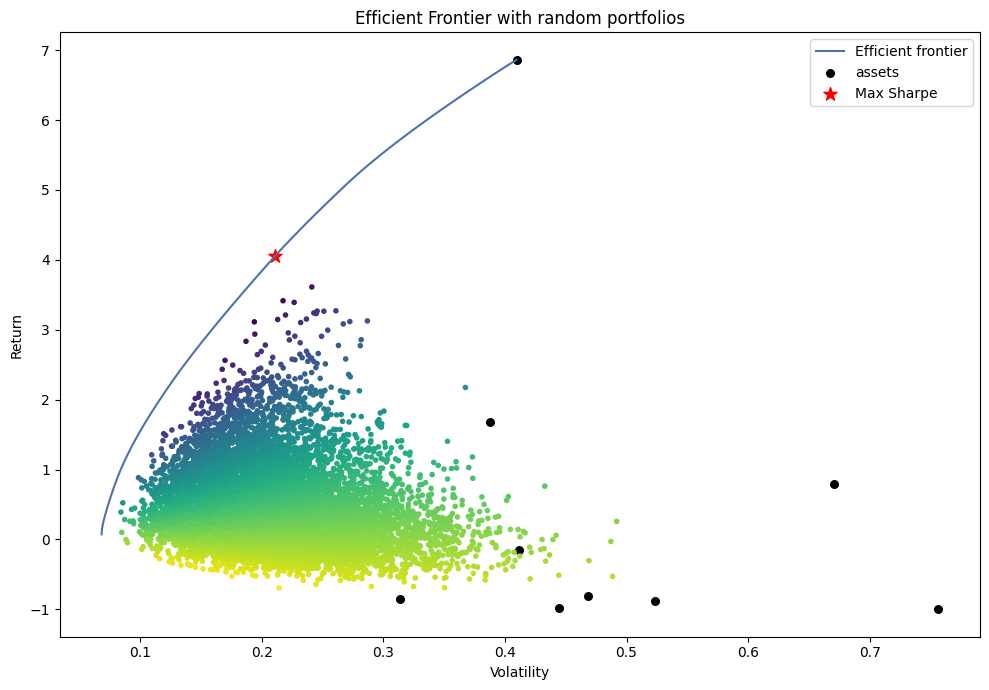

{'JMS': 0.19911675625377606,
 'CIN': 0.21565192119647467,
 'GRR': 0.07024177660909611,
 'TBR': 0.5149895459406533}

In [13]:
result = ef_random_portfolio(df['stock_code'], days = PLAN_RANGE)
result = {k : result[k] for k in result if result[k] > 0}
result

In [14]:
fibonacci_retracement_strategy(list(result.keys()), days = PLAN_RANGE * 2)

Query JMS


Query CIN
Query GRR
Query TBR


In [15]:
FEE = 5.0
LARGE_FEE = 10.0
TOTAL = 3000
PURCHASE_PRICE = {
    'JMS' : 0.175,
    'CIN' : 29.73,
    'GRR' : 0.436,
    'TBR' : 2.9
}
for stock_code in result:
    print(f"Code: {stock_code}")
    investment = TOTAL * result[stock_code]
    print(f"Investment: {investment}")
    print(f"No of shares: {(investment - FEE) / PURCHASE_PRICE[stock_code]}")

Code: JMS
Investment: 597.3502687613282
No of shares: 3384.858678636161
Code: CIN
Investment: 646.955763589424
No of shares: 21.592861203815136
Code: GRR
Investment: 210.72532982728833
No of shares: 471.84708675983563
Code: TBR
Investment: 1544.9686378219599
No of shares: 531.0236682144689


In [16]:
momentum_indicators(result, lookback_window=14)

Query JMS


/home/khoa/repo/stock_data_scraper/analysis/modules/indicators.py:71: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Query CIN


/home/khoa/repo/stock_data_scraper/analysis/modules/indicators.py:71: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Query GRR


/home/khoa/repo/stock_data_scraper/analysis/modules/indicators.py:71: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Query TBR


/home/khoa/repo/stock_data_scraper/analysis/modules/indicators.py:85: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

/home/khoa/repo/stock_data_scraper/analysis/modules/indicators.py:85: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

/home/khoa/repo/stock_data_scraper/analysis/modules/indicators.py:85: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



date    JMS                                                  CIN  \
                close        rsi rsi_trend        adx adx_trend      close   
0   2023-12-28  0.170  48.537040      wait  23.964779      wait        NaN   
1   2023-12-29  0.165  43.938645      wait  23.351411      wait  29.600000   
2   2024-01-02  0.165  43.938645      wait  22.426517      wait  29.700001   
3   2024-01-03  0.175  54.038716      wait  21.567686      wait  30.299999   
4   2024-01-04  0.180  58.103134      wait  22.087339      wait  29.700001   
5   2024-01-05  0.175  53.050898      wait  22.569873      wait  29.709999   
6   2024-01-08  0.175  53.050898      wait  23.017941      wait  30.000000   
7   2024-01-09  0.180  57.351752      wait  24.473341      wait  30.250000   
8   2024-01-10  0.175  52.201861      wait  23.976299      wait  30.250000   
9   2024-01-11  0.175  52.201861      wait  23.514759      wait  30.000000   
10  2024-01-12  0.175  52.201861      wait  24.105941      wait  30.000000   
11  2024-01-15  0.175  52.201861      wait  24.654896      wait  30.049999   
12  2024-01-16  0.175  52.201861      wait  25.609027      bull  30.049999   
13  2024-01-17    NaN        NaN       NaN        NaN       NaN  30.000000   
14  2024-01-19  0.175  52.201861      wait  26.495006      wait  29.620001   

                                                GRR                       \
          rsi rsi_trend        adx adx_trend  close        rsi rsi_trend   
0         NaN       NaN        NaN       NaN  0.475  63.627165      wait   
1   66.058095      wait  41.119895      wait  0.465  59.635703      wait   
2   67.128650      wait  41.787472      wait  0.510  69.046006      wait   
3   72.693697      bear  42.989029      wait  0.495  63.713846      wait   
4   61.483908      wait  43.211723      wait  0.480  58.821822      wait   
5   61.590201      wait  43.418511      wait  0.495  61.966698      wait   
6   64.638450      wait  43.932973      wait  0.465  53.213401      wait   
7   67.065011      wait  44.665174      wait  0.470  54.370296      wait   
8   67.065011      wait  45.345076      wait  0.460  51.621048      wait   
9   62.121123      wait  45.125999      wait  0.465  52.903369      wait   
10  62.121123      wait  44.922571      wait  0.470  54.210417      wait   
11  62.757917      wait  44.733674      wait  0.460  51.152781      wait   
12  62.757917      wait  44.558269      wait  0.440  45.611699      wait   
13  61.557716      wait  44.188588      wait    NaN        NaN       NaN   
14  53.226351      wait  42.423859      wait  0.440  45.611699      wait   

                          TBR                                            
          adx adx_trend close        rsi rsi_trend        adx adx_trend  
0   19.909962      wait  2.86  54.631565      wait  17.785363      wait  
1   20.757256      wait  2.95  59.475701      wait  17.035166      wait  
2   22.485716      wait  2.95  59.475701      wait  16.338554      wait  
3   24.090715      wait  2.95  59.475701      wait  15.310438      wait  
4   24.861389      wait  2.94  58.607291      wait  14.355759      wait  
5   26.046563      bull  2.87  52.796030      wait  13.681310      wait  
6   25.730467      wait  2.86  52.002743      wait  13.152046      wait  
7   25.293611      wait  2.86  52.002743      wait  12.863145      wait  
8   24.594744      wait  2.96  59.125551      wait  12.594879      wait  
9   23.247943      wait  2.96  59.125551      wait  12.345776      wait  
10  22.454643      wait  2.96  59.125551      wait  12.114465      wait  
11  21.718008      wait  2.86  49.880314      wait  11.770339      wait  
12  20.617353      wait  3.03  61.034867      wait  11.824652      wait  
13        NaN       NaN   NaN        NaN       NaN        NaN       NaN  
14  19.595316      wait  2.93  53.493045      wait  11.546336      wait